In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
image_folder = '/content/gdrive/MyDrive/cow-images/'  # Update the path to your "cow-images" folder
image_filenames = os.listdir(image_folder)

# Initialize a dictionary to store the mapping of image filenames to weights
image_weights_mapping = {}

for filename in image_filenames:
    # Assuming the filename format is "<id>_<weight>.jpg"
    weight_start_index = filename.find('_') + 1
    weight_end_index = filename.find('.jpg')
    weight = float(filename[weight_start_index:weight_end_index])  # Extract the weight from the filename
    image_weights_mapping[filename] = weight

# Check the mapping of image filenames to weights
print(image_weights_mapping)


{'1672_192.jpg': 192.0, '1670_160.jpg': 160.0, '1674_102.jpg': 102.0, '1669_122.jpg': 122.0, '1677_136.jpg': 136.0, '1676_111.jpg': 111.0, '1680_156.jpg': 156.0, '1679_133.jpg': 133.0, '1675_104.jpg': 104.0, '1678_204.jpg': 204.0, '1681_166.jpg': 166.0, '1683_193.jpg': 193.0, '1685_131.jpg': 131.0, '1686_147.jpg': 147.0, '1687_194.jpg': 194.0, '1682_169.jpg': 169.0, '1684_119.jpg': 119.0, '1689_131.jpg': 131.0, '1688_109.jpg': 109.0, '1693_117.jpg': 117.0, '1690_146.jpg': 146.0, '1691_194.jpg': 194.0, '1692_253.jpg': 253.0, '1695_194.jpg': 194.0, '1697_99.jpg': 99.0, '1698_122.jpg': 122.0, '1694_148.jpg': 148.0, '1696_250.jpg': 250.0, '1699_138.jpg': 138.0, '1704_104.jpg': 104.0, '1705_129.jpg': 129.0, '1706_163.jpg': 163.0, '1701_204.jpg': 204.0, '1702_215.jpg': 215.0, '1700_194.jpg': 194.0, '1707_194.jpg': 194.0, '1712_163.jpg': 163.0, '1711_154.jpg': 154.0, '1710_148.jpg': 148.0, '1709_120.jpg': 120.0, '1708_297.jpg': 297.0, '1713_146.jpg': 146.0, '1718_128.jpg': 128.0, '1719_150.jp

In [ ]:
import csv

# Provide the filename for the CSV file to store the mapping
csv_file = '/content/gdrive/MyDrive/cow_weights_mapping.csv'  # Update the desired CSV file path

# Save the mapping to the CSV file
with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Image Filename', 'Weight'])
    for filename, weight in image_weights_mapping.items():
        csv_writer.writerow([filename, weight])

print("Mapping saved to CSV successfully!")


Mapping saved to CSV successfully!


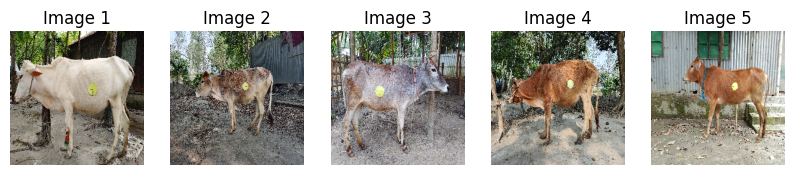

In [ ]:
import matplotlib.pyplot as plt

# Display some sample images
plt.figure(figsize=(10, 10))
num_samples = 5  # Adjust the number of sample images to display
sample_images = np.random.choice(os.listdir(image_folder), num_samples, replace=False)
for i, filename in enumerate(sample_images):
    image_path = os.path.join(image_folder, filename)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i + 1}")
    plt.axis('off')
plt.show()

In [ ]:

# Step 1: Load the VGG16 model (without the classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Preprocess Input Images
def preprocess_image(image_path):
    img = load_and_preprocess_image(image_path)
    return img

def load_and_preprocess_image(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = preprocess_input(img)
    return img

# Step 3: Extract Features
def extract_features(image_path, model):
    img = preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    features = model.predict(img)
    return features

# Path to your "cow-images" folder
image_folder = '/content/gdrive/MyDrive/cow-images/'

# Initialize a dictionary to store image filenames and their corresponding features
image_features_mapping = {}

# Extract features for all images in the folder
for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    features = extract_features(image_path, base_model)
    image_features_mapping[filename] = features

# Now, the dictionary 'image_features_mapping' contains image filenames as keys and their corresponding features as values.
# These extracted features will be used for the regression model in Step 3.

# Example usage:
# To get the features of an image, you can use:
# image_filename = "1_225.jpg"  # Replace this with the filename of the image you want to query
# features_of_image = image_features_mapping[image_filename]


1/1 [==============================] - 0s 376ms/step


In [ ]:
# Example usage:
# To get the features of an image, you can use:
#image_filename = "1_172.jpg"  # Replace this with the filename of the image you want to query
#features_of_image = image_features_mapping[image_filename]

## t-SNE Visualization of Features

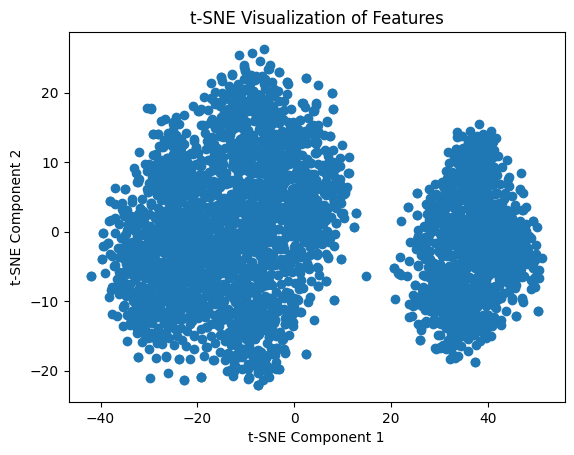

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert the features from the dictionary to a numpy array
features_array = np.array(list(image_features_mapping.values()))

# Reshape the features array to have shape (n_samples, n_features)
n_samples, n_features = features_array.shape[0], np.prod(features_array.shape[1:])
features_array = features_array.reshape(n_samples, n_features)

# Step 1: Use t-SNE to reduce the dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_array)

# Plot the 2D t-SNE result
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Features')
plt.show()

### **RandomForestRegressor**

In [ ]:
#Mean Squared Error (MSE): 1366.6926296714273
#Mean Absolute Error (MAE): 28.543421797004992

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert the features from the dictionary to a numpy array
features_array = np.array(list(image_features_mapping.values()))

# Get the corresponding cow weights (target variable y)
cow_weights = np.array(list(image_weights_mapping.values()))

# Step 1: Data Preparation
X = features_array.reshape(features_array.shape[0], -1)  # Flatten the features for each image
y = cow_weights

# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Selection (Random Forest Regression)
regressor = RandomForestRegressor(random_state=42)

# Step 4: Model Training
regressor.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 1520.5785568855092
Mean Absolute Error (MAE): 30.53582968861422


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(regressor, 'model-vgg-rf.joblib')

['model-vgg-rf.joblib']

1/1 [==============================] - 0s 393ms/step


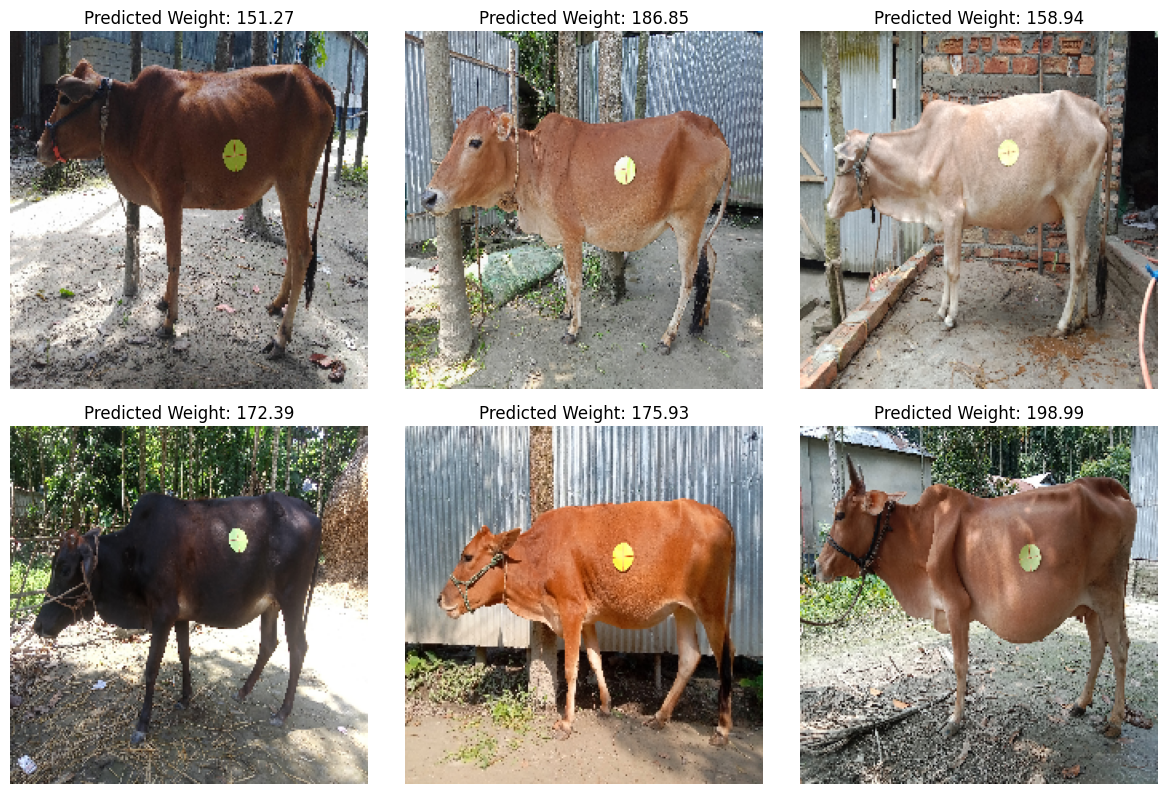

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import joblib
import matplotlib.pyplot as plt

# Load the pre-trained VGG16 model (without classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load the trained Random Forest Regressor model
with open('model-vgg-rf.joblib', 'rb') as file:
    regressor = joblib.load(file)

# Function to preprocess an image
def preprocess_image(image_path):
    img = load_and_preprocess_image(image_path)
    return img

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = preprocess_input(img)
    return img

# Function to extract features from an image using VGG16
def extract_features(image_path, base_model):
    img = preprocess_image(image_path)
    img = tf.expand_dims(img, axis=0)
    features = base_model.predict(img)
    return features.flatten()

# Path to the folder containing five new images
new_images_folder = '/content/gdrive/MyDrive/predict/'  # Replace with the path to your images folder

# Initialize a list to store the predictions for five images
predictions = []

# Process and predict each image
#for filename in os.listdir(new_images_folder)[:5]:  # Take the first five images in the folder
for filename in os.listdir(new_images_folder):
    image_path = os.path.join(new_images_folder, filename)
    new_features = extract_features(image_path, base_model)
    weight_prediction = regressor.predict(new_features.reshape(1, -1))
    predictions.append((image_path, weight_prediction[0]))


# Show the predictions for six images in a 3x3 grid layout
plt.figure(figsize=(12, 12))
for i, (image_path, weight_prediction) in enumerate(predictions):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted Weight: {weight_prediction:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()